### Assignment 01
### Index No: 190072E
### Name: E.M.D.A. Bandara

In [119]:
#importing required Libraries
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline




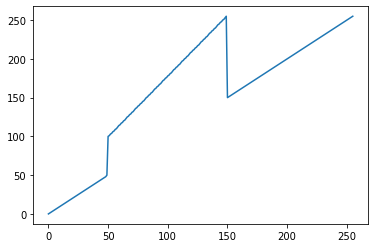

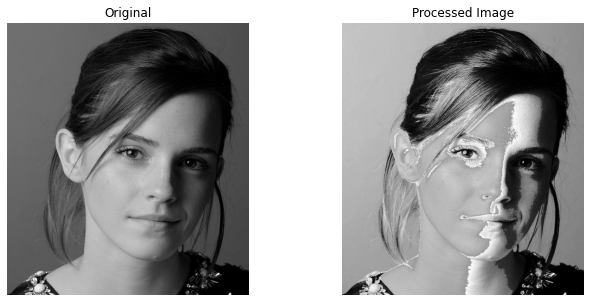

In [120]:
#Quesntion 01
img = cv.imread('images/emma_gray.jpg')
assert img is not None

#Piecewise creation of intensity transformation
t_1 = np.linspace(0, 50, 50, endpoint= True)
t_2 = np.linspace(100, 255, 100, endpoint= True)
t_3 = np.linspace(150, 255, 106, endpoint= True)

index = np.linspace(0, 255, 256, endpoint= True).astype(np.uint8)
t = np.concatenate((t_1, t_2, t_3), axis = 0).astype(np.uint8)

plt.plot(index, t)

assert len(index) == 256
assert len(t) == 256

#Intensity transformation
transformed_img = cv.LUT(img, t) #Lookup table for intensity transformation

fig, ax = plt.subplots( 1, 2, figsize = (11, 5))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(transformed_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Processed Image')

for i in range(2):
    ax[i].axis('off')
plt.show()


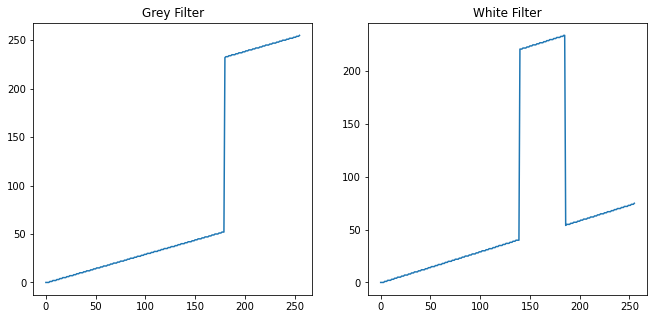

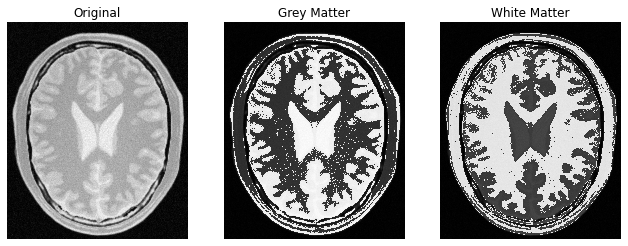

In [121]:
#Question 02
img = cv.imread('images/brain_proton_density_slice.png')
assert img is not None

index = np.linspace(0, 255, 256, endpoint= True).astype(np.uint8)

#creating filter to extracy grey matter feature
gap = 180 #increase in intensity of the relevant intensity values
grey_1 = np.linspace(0, 0, 180, endpoint= True)
grey_2 = np.linspace(gap, gap, 76, endpoint= True) 
grey = np.concatenate((grey_1, grey_2), axis = 0).astype(np.uint8)
linear_transform = np.linspace(0, 255-gap, 256, endpoint=True) #Linear transformation
grey = grey + linear_transform
grey = grey.astype(np.uint8)

##creating filter to extracy white matter feature
gap = 180 #increase in intensity of the relevant intensity values
white_1 = np.linspace(0, 0, 140, endpoint= True)
white_2 = np.linspace(gap, gap, 46, endpoint= True)
white_3 = np.linspace(0, 0, 70, endpoint= True)
linear_transform = np.linspace(0, 255-gap, 256, endpoint=True) #Linear transformation
white = np.concatenate((white_1, white_2, white_3), axis = 0).astype(np.uint8)
white = white + linear_transform
white = white.astype(np.uint8)

#Translating according to lookup table
grey_matter  = cv.LUT(img, grey)
white_matter = cv.LUT(img, white)

fig, ax = plt.subplots( 1, 2, figsize = (11, 5))
ax[0].plot(index, grey)
ax[0].set_title('Grey Filter')
ax[1].plot(index, white)
ax[1].set_title('White Filter')


fig, ax = plt.subplots( 1, 3, figsize = (11, 5))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(grey_matter, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Grey Matter')
ax[2].imshow(white_matter, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('White Matter')

for i in range(3):
    ax[i].axis('off')

plt.show()



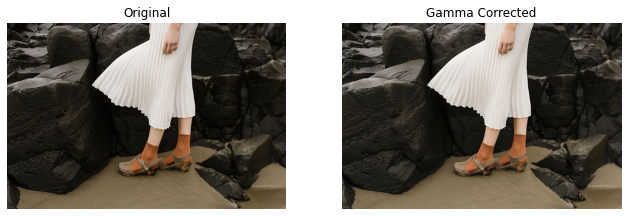

Text(0.5, 1.0, 'After Gamma Correction')

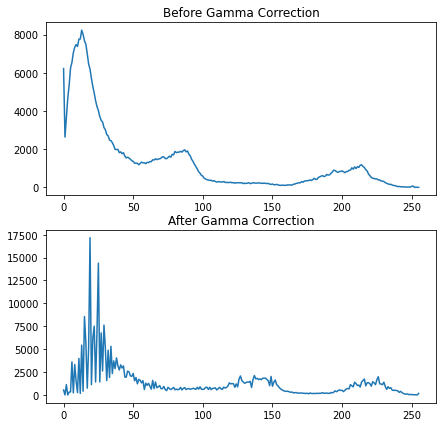

In [122]:
#Question 03
img = cv.imread('images/highlights_and_shadows.jpg')
assert img is not None

#getting L*a*b plane values 
lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

gamma = 1/1.14

#Gamma correction lookup table
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
lab_img[:, :, 0] = cv.LUT(lab_img[:, :, 0],t)

gamma_img = cv.cvtColor(lab_img, cv.COLOR_Lab2RGB)

fig, ax = plt.subplots(1, 2, figsize = (11, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(gamma_img)
ax[1].set_title('Gamma Corrected')

for i in range(2):
    ax[i].axis('off')

plt.show()

hist_img = cv.calcHist([img], [0], None, [256], [0,256])
hist_gamma_img = cv.calcHist([gamma_img], [0], None, [256], [0,256])

fig, ax = plt.subplots(2, 1, figsize=(7,7))

ax[0].plot(hist_img)
ax[0].set_title("Before Gamma Correction")
ax[1].plot(hist_gamma_img)
ax[1].set_title("After Gamma Correction")



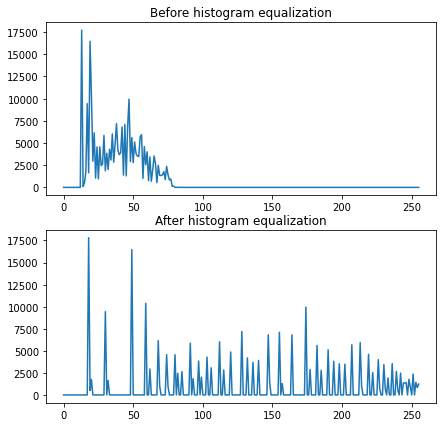

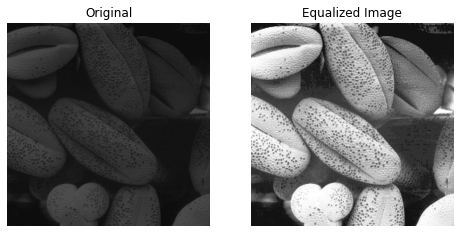

In [123]:
#Question 04
f = cv.imread('images/shells.png' , cv.IMREAD_GRAYSCALE)
assert f is not None

#Dimensions ( height, width) of the given image
M = f.shape[0]
N = f.shape[1]

#flattened intensity array
g = f.flatten()
g = g[:, np.newaxis]

#Count unique intensity values in the flattened intensity array
(unique, counts) = np.unique(g, return_counts=True)
frequencies = np.asarray((unique, counts)).T

lookup_table = np.zeros((256)) #Creating lookuptable with indexes from 0 -  255

for i in range(256): # Calculate cumalative sum until the index
    lookup_table[i] = np.sum(frequencies[:, 1], where = frequencies[:,0] <= i)

lookup_table = lookup_table*(256-1)/(M*N)  #Intensity transformation for histogram equalization
lookup_table = lookup_table.round().astype(np.uint8)

equalized_img = cv.LUT(f, lookup_table) #Transforming image using lookup table

#Generating histogram for images before and after histogram equalization
hist_f = cv.calcHist([f], [0], None, [256], [0,256])
hist_equalized = cv.calcHist([equalized_img], [0], None, [256], [0,256])

fig, ax = plt.subplots(2, 1, figsize=(7,7))

ax[0].plot(hist_f)
ax[0].set_title("Before histogram equalization")
ax[1].plot(hist_equalized)
ax[1].set_title("After histogram equalization")

fig, ax = plt.subplots(1, 2, figsize = (8, 8))
ax[0].imshow(cv.cvtColor(f,cv.COLOR_GRAY2RGB))
ax[0].set_title("Original")
ax[1].imshow(cv.cvtColor(equalized_img,cv.COLOR_GRAY2RGB))
ax[1].set_title("Equalized Image")

for i in range(2):
    ax[i].axis('off')

plt.show()

(1080, 1920, 3)
SSD error for nearest neighbour zoom:  40.11174270190329
(1080, 1920, 3)
SSD error for Bilinear zoom:  39.257033179012346


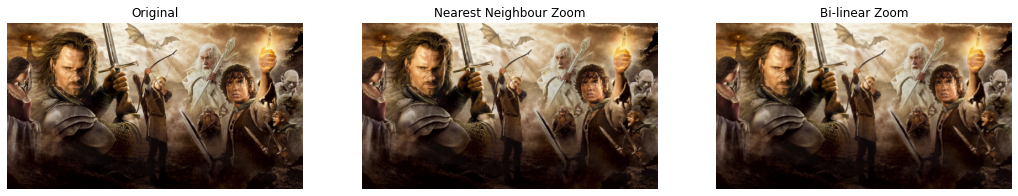

In [124]:
#Question 05

img = cv.imread('images/a1q5images/im01small.png')
original_img = cv.imread('images/a1q5images/im01.png')
assert img is not None
assert original_img is not None

def zoom(img, scaling_factor, mode = "nearest_neighbour"):

    #caluculating rows and columns count of the output image
    rows = round(img.shape[0] * scaling_factor)
    cols = round(img.shape[1] * scaling_factor)

    zoomed_img = np.zeros((rows, cols, 3))

    #Nearest Neighbour zooming method
    if ( mode == "nearest_neighbour"):
        for row in range(rows):
            for col in range(cols):
                #Calculating row and column number of the source image relevant to a pixel of the zoomed image
                src_row = round(row/scaling_factor)
                src_col = round(col/scaling_factor)

                #Correcting overflow error
                if (src_row > img.shape[0] - 1):
                    src_row = img.shape[0] - 1
                if (src_col > img.shape[1] - 1): 
                    src_col = img.shape[1] - 1


                zoomed_img[row, col] = img[ src_row, src_col] 
        
    #Bilinear Zooming Method
    elif ( mode == "bilinear"):
        for row in range(rows):
            for col in range(cols):
                #Calculating row and column number of the source image relevant to a pixel of the zoomed image
                row_pos = row/scaling_factor
                col_pos = col/scaling_factor
                src_row_top     = int(row_pos) 
                src_row_bottom  = src_row_top + 1
                src_col_left    = int(col_pos)
                src_col_right   = src_col_left + 1

                #Correcting overflow error
                if (src_row_bottom > img.shape[0] - 1):
                    src_row_bottom = img.shape[0] - 1
                if (src_col_right > img.shape[1] - 1): 
                    src_col_right = img.shape[1] - 1

                #Calculating dividing ratios between four neigbhouring pixel values
                row_division = ( row_pos - src_row_top, 1 - (row_pos - src_row_top))
                col_division = ( col_pos - src_col_left, 1 - (col_pos - src_col_left))

                #Calculating intermediate values in row wise
                row_intermediate_left  = img[src_row_top, src_col_left]*row_division[1]  + img[src_row_bottom, src_col_left]*row_division[0]
                row_intermediate_right = img[src_row_top, src_col_right]*row_division[1]  + img[src_row_bottom, src_col_right]*row_division[0]

                #Calculating final pixel value
                zoomed_img[row, col] = row_intermediate_left*col_division[1] + row_intermediate_right*col_division[0]

    zoomed_img = zoomed_img.astype(np.uint8)

    return zoomed_img

#Calculating SSD error
def ssdError( original, scaledImage):
    assert original.shape == scaledImage.shape
    print(original.shape)
    return np.sum((original - scaledImage)**2)/(original.shape[0] * original.shape[1] * 3) 

zoomed_img_nn = zoom(img, 4, "nearest_neighbour")
print("SSD error for nearest neighbour zoom: ", ssdError(original_img, zoomed_img_nn))

zoomed_img_bl = zoom(img, 4, "bilinear")
print("SSD error for Bilinear zoom: ", ssdError(original_img, zoomed_img_bl))

fig, ax = plt.subplots( 1, 3, figsize = (18, 12))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(zoomed_img_nn, cv.COLOR_BGR2RGB))
ax[1].set_title('Nearest Neighbour Zoom')
ax[2].imshow(cv.cvtColor(zoomed_img_bl, cv.COLOR_BGR2RGB))
ax[2].set_title('Bi-linear Zoom')

for i in range(3):
    ax[i].axis('off')

plt.show()


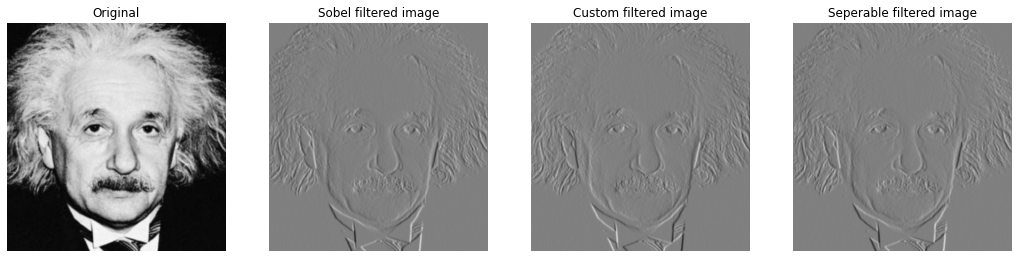

In [125]:
#Question 06

img = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

#Creating sobel filter
sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float32)

sobel_img = cv.filter2D(img, -1, sobel_filter) #Using inbuilt sobel filter


fig, ax = plt.subplots( 1, 4, figsize = (18, 6))
ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(sobel_img, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel filtered image')

#Custom Code for Soble Filtering 
def sobelFilter(img):
        sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float32)
        #Flipping image up and down and flip left and right
        sobel_filter = np.flipud(np.fliplr(sobel_filter))


        output = np.zeros(img.shape, dtype = np.float32 )
        padded_img = np.pad(img, 1, 'constant') #Padding image

        #Convolving filter accross the image
        for y in range(img.shape[1]):
                for x in range(img.shape[0]):
                        output[x, y] = (sobel_filter * padded_img[x: x + 3, y: y + 3]).sum()

        return output
        

custom_filtered_img = sobelFilter(img)

ax[2].imshow(custom_filtered_img, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title('Custom filtered image')

#Seperable filters
sobel_row_filter = np.array([1, 0, -1], dtype = np.float32)
sobel_column_filter = np.array([1, 2, 1], dtype = np.float32)

#Using 1-D convolutiong to output filtered image
seperable_filtered_img = cv.sepFilter2D(img, -1, sobel_row_filter, sobel_column_filter)
ax[3].imshow(seperable_filtered_img, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[3].set_title('Seperable filtered image')

for i in range(4):
    ax[i].axis('off')

plt.show()



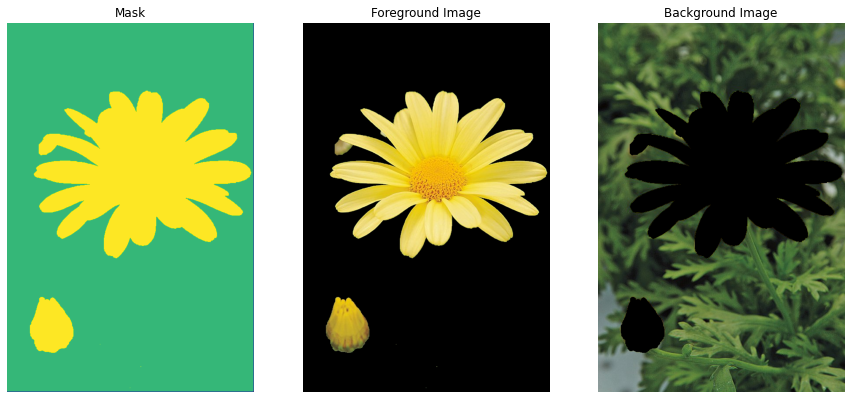

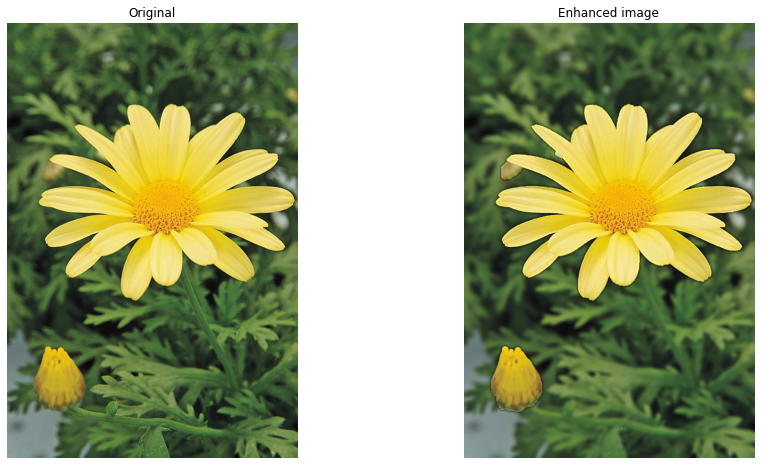

In [126]:
#Question 07

img = cv.imread('images/daisy.jpg')
assert img is not None

#arrays required by the grabCut algorithm
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#Rectangular areas to run grabCut algorithm
rect = (0, 0, 560, 840)
mask = np.zeros(img.shape[:2],np.uint8)

cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

foreground = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
foreground_img = img*foreground[:,:,np.newaxis]
background = np.where((mask==3)|(mask==1), 0, 1).astype('uint8')
background_img = img*background[:,:,np.newaxis]

fig, ax = plt.subplots( 1, 3, figsize = (15, 8))

ax[0].imshow(mask)
ax[0].set_title('Mask')
ax[1].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Image')
ax[2].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
for i in range(3):
    ax[i].axis('off')

plt.show()

#Gausian kernel parameters
k_size = 9
sigma  = 4
#Blurring the background
blurred_background = cv.GaussianBlur(background_img, (k_size, k_size), sigma)
enhanced_image = cv.bitwise_or(blurred_background, foreground_img)

fig, ax = plt.subplots( 1, 2, figsize = (15, 8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Enhanced image')

for i in range(2):
    ax[i].axis('off')

plt.show()
plt.show()





